In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import Dataset**

In [16]:
Sales = pd.read_csv('/content/Sales_2019.csv')

In [17]:
Sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales Amount,Date,Time,Day,Year,Month
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",700.00,1/22/2019,21:25:00,22,2019,1
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",14.95,1/28/2019,14:15:00,28,2019,1
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1/17/2019,13:33:00,17,2019,1
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1/5/2019,20:33:00,5,2019,1
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",11.99,1/25/2019,11:59:00,25,2019,1


#**Descriptive statistics**

In [18]:
Sales.describe()[['Quantity Ordered','Sales Amount']]

,Quantity Ordered,Sales Amount
count,185950.000000,185950.000000
mean,1.124383,185.490917
std,0.442793,332.919771
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,3400.000000


**185950 Orders in 2019**

**Total Revenue in 2019:**

In [129]:
Total_Revenue = Sales['Sales Amount'].sum()
print('Total Revenue: {:,} $'.format(round(Total_Revenue,2)))

Total Revenue: 34,492,035.97 $


**Total Sales in 2019:**

In [131]:
Total_Sales = Sales['Quantity Ordered'].sum()
print('Total Sales: {:,} products'.format(round(Total_Sales,2)))

Total Revenue: 209,079 products


**Average revenue per month:**

In [132]:
avg_revenue_per_month = Total_Revenue / 12
print('Average revenue per month: {:,} $/month'.format(round(avg_revenue_per_month,2)))

Average revenue per month: 2,874,336.33 $/month


**Top 3 products with the highest sales:**

In [22]:
Sales.groupby(by=["Product"])[['Quantity Ordered','Sales Amount']].sum().sort_values(by = ['Quantity Ordered'],ascending = False).iloc[:3]

,Quantity Ordered,Sales Amount
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25


**Top 3 products with the highest revenue:**

In [23]:
Sales.groupby(by=["Product"])[['Quantity Ordered','Sales Amount']].sum().sort_values(by = ['Sales Amount'],ascending = False).iloc[:3]

,Quantity Ordered,Sales Amount
Product,,
Macbook Pro Laptop,4728,8037600.0
iPhone,6849,4794300.0
ThinkPad Laptop,4130,4129958.7


**Statistics on the frequency of each product's appearance**

In [24]:
Sales.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

**Revenue growth rate per month**

In [26]:
df_growth_rate = Sales.groupby(by=["Month"])['Sales Amount'].sum().reset_index()

In [27]:
df_growth_rate['Prev_Month'] = df_growth_rate['Month'].apply(lambda x:x-1)
df_growth_rate

,Month,Sales Amount,Prev_Month
0,1,1822256.73,0
1,2,2202022.42,1
2,3,2807100.38,2
3,4,3390670.24,3
4,5,3152606.75,4
5,6,2577802.26,5
6,7,2647775.76,6
7,8,2244467.88,7
8,9,2097560.13,8
9,10,3736726.88,9


In [28]:
df_growth_rate2 = df_growth_rate.merge(df_growth_rate, left_on='Prev_Month', right_on='Month', how = 'left', suffixes = ('','_prev'))

In [29]:
df_growth_rate2 = df_growth_rate2.drop(columns = ['Prev_Month','Month_prev','Prev_Month_prev'])



In [30]:
columns = ['Month','Sales Amount','Sales Amount_prev']
df_growth_rate2 = df_growth_rate2[columns]

In [31]:
df_growth_rate2

,Month,Sales Amount,Sales Amount_prev
0,1,1822256.73,NaN
1,2,2202022.42,1822256.73
2,3,2807100.38,2202022.42
3,4,3390670.24,2807100.38
4,5,3152606.75,3390670.24
5,6,2577802.26,3152606.75
6,7,2647775.76,2577802.26
7,8,2244467.88,2647775.76
8,9,2097560.13,2244467.88
9,10,3736726.88,2097560.13


In [32]:
df_growth_rate2['%growth'] = np.where(df_growth_rate2['Sales Amount_prev'] == 0, 0, 
                                      (df_growth_rate2['Sales Amount']-df_growth_rate2['Sales Amount_prev'])*100/df_growth_rate2['Sales Amount_prev'])

In [33]:
df_growth_rate2['%growth'] = df_growth_rate2['%growth'].round(decimals=2, out=None)

In [133]:
df_growth_rate2

,Month,Sales Amount,Sales Amount_prev,%growth
0,1,1822256.73,NaN,NaN
1,2,2202022.42,1822256.73,20.84
2,3,2807100.38,2202022.42,27.48
3,4,3390670.24,2807100.38,20.79
4,5,3152606.75,3390670.24,-7.02
5,6,2577802.26,3152606.75,-18.23
6,7,2647775.76,2577802.26,2.71
7,8,2244467.88,2647775.76,-15.23
8,9,2097560.13,2244467.88,-6.55
9,10,3736726.88,2097560.13,78.15


#**Visualizaion**

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [37]:
plt.style.use('seaborn')

##**Sales and Revenue by Month**

**Prepare Data**

In [39]:
df1 = Sales.groupby(by=["Month"])[['Sales Amount','Quantity Ordered']].sum().reset_index()

In [40]:
#convert from ($) to thousand ($)
df1['Revenue'] = df1['Sales Amount']/1000
df1['Revenue'] = df1['Revenue'].round(decimals=2, out=None)
del df1['Sales Amount']

In [41]:
df1

,Month,Quantity Ordered,Revenue
0,1,10903,1822.26
1,2,13449,2202.02
2,3,17005,2807.10
3,4,20558,3390.67
4,5,18667,3152.61
5,6,15253,2577.80
6,7,16072,2647.78
7,8,13448,2244.47
8,9,13109,2097.56
9,10,22703,3736.73


**Draw chart**

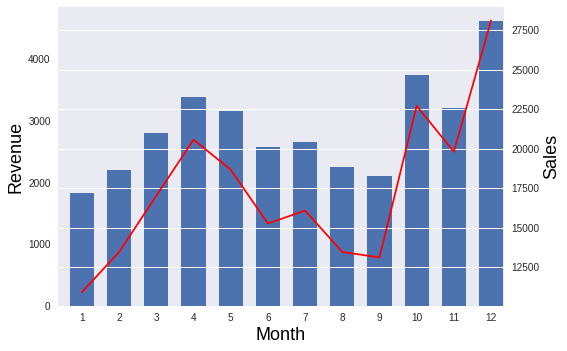

In [42]:
width = .65 # width of a bar

df1['Revenue'].plot(kind='bar', width = width)
plt.xlabel('Month',size = '18',color = 'black')
plt.ylabel('Revenue',size = '18',color = 'black')
df1['Quantity Ordered'].plot(secondary_y=True,color = 'red')
plt.ylabel('Sales',size = '18',color = 'black')

ax = plt.gca()
plt.xlim([-width, len(df1['Revenue'])-width])
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11','12'));


##**Sales and Revenue by Product Type**

**Prepare Data**


In [43]:
#Take unique product list
Sales['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [44]:
#based on the list, create 'Product Type' column
Sales['Product Type'] = Sales['Product'].apply(lambda x:x.split(" ")[-1])
Sales['Product Type'] = Sales['Product Type'].apply(lambda x:x.replace('iPhone','Phone'))
Sales['Product Type'] = Sales['Product Type'].apply(lambda x:x.replace('(4-pack)','Battery'))
Sales['Product Type'] = Sales['Product Type'].apply(lambda x:x.replace('Dryer','LG'))
Sales['Product Type'] = Sales['Product Type'].apply(lambda x:x.replace('Machine','LG'))
Sales['Product Type'].unique()

array(['Phone', 'Cable', 'Headphones', 'Monitor', 'Battery', 'Laptop',
       'TV', 'LG'], dtype=object)

In [45]:
df2 = Sales.groupby(by=["Product Type"])[['Sales Amount','Quantity Ordered']].sum().reset_index()
df2['Revenue'] = df2['Sales Amount']/1000
df2['Revenue'] = df2['Revenue'].round(decimals=2, out=None)
del df2['Sales Amount']
df2

,Product Type,Quantity Ordered,Revenue
0,Battery,58652,198.86
1,Cable,47192,633.60
2,Headphones,49675,3941.19
3,LG,1312,787.20
4,Laptop,8858,12167.56
5,Monitor,24122,6377.23
6,Phone,14449,8940.70
7,TV,4819,1445.70


**Draw chart**

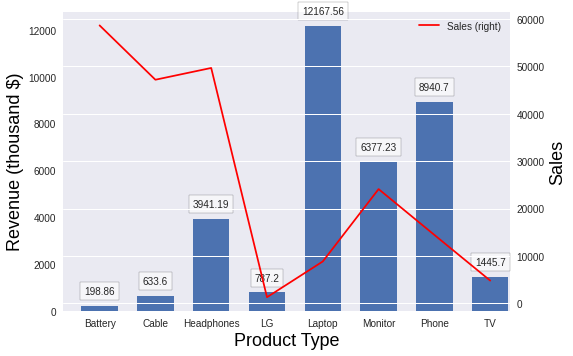

In [46]:

width = .65 # width of a bar

df2['Revenue'].plot(kind='bar', width = width)
for i in range(df2.shape[0]):
    plt.text(i, list(df2['Revenue'])[i]+500, list(df2['Revenue'])[i], ha = 'center',
              Bbox = dict(facecolor = 'white', alpha =.6))
plt.xlabel('Product Type',size = '18',color = 'black')
plt.ylabel('Revenue (thousand $)',size = '18',color = 'black')
df2['Quantity Ordered'].plot(secondary_y=True,color = 'red',label = 'Sales')
plt.ylabel('Sales',size = '18',color = 'black')
ax = plt.gca()
plt.xlim([-width, len(df2['Revenue'])-width]);
plt.legend()
ax.set_xticklabels(tuple(df2['Product Type']));


##**Revenue by City**

**Prepare Data**

In [47]:
Sales['City'] = Sales['Purchase Address'].apply(lambda x : x.split(',')[1][1:])
df3 = Sales.groupby(by=["City"])['Sales Amount'].sum().reset_index()
df3['Revenue'] = df3['Sales Amount']/1000
df3['Revenue'] = df3['Revenue'].round(decimals=2, out=None)
del df3['Sales Amount']
df3

,City,Revenue
0,Atlanta,2795.50
1,Austin,1819.58
2,Boston,3661.64
3,Dallas,2767.98
4,Los Angeles,5452.57
5,New York City,4664.32
6,Portland,2320.49
7,San Francisco,8262.20
8,Seattle,2747.76


**Draw Chart**

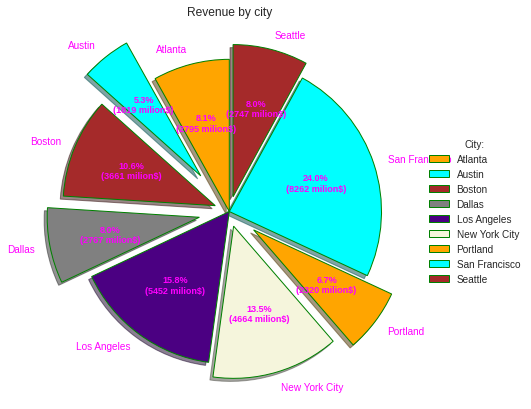

In [48]:
cityname = list(df3['City'])
 
data = list(df3['Revenue'])
 
 
# Creating explode data
explode = (0.0, 0.3, 0.1, 0.2, 0.0, 0.1, 0.2, 0.0, 0.1)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} milion$)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cityname,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, cityname,
          title ="City:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 9, weight ="bold")
ax.set_title("Revenue by city");

##**% revenue growth over the months**

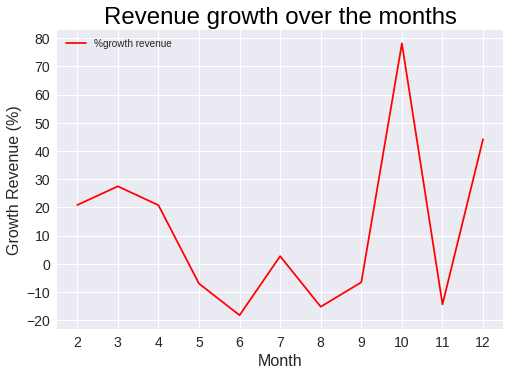

In [127]:
plt.plot(df_growth_rate2['Month'],df_growth_rate2['%growth'],color = 'red',label = '%growth revenue');
plt.ylabel('Growth Revenue (%)',size = '16')
plt.xlabel('Month',size = '16');
plt.legend();
plt.title('Revenue growth over the months',size = '24',color = 'black');
plt.xticks(list(df_growth_rate2['Month'])[1:],size = '14');
plt.yticks(np.arange(-20,81,10),size = '14');


#**Enter information to get statistical results**

In [52]:
#Enter Month (1,2, ... or all)
temp = input("Enter month: ")
if temp == 'all':
  months = list(Sales['Month'].unique())
else:
  months = temp.split(",")
  months =[int(month) for month in months]

#Enter Product Type (Phone,Cable, ... or all)
print(list(Sales['Product Type'].unique()))
temp = input("Enter Product Type: ")
if temp == 'all':
  product_types = list(Sales['Product Type'].unique())
else:
  product_types = temp.split(",")

#Enter City (Dallas,Boston, ... or all)
print(list(Sales['City'].unique()))
temp = input("Enter City: ")
if temp == 'all':
  citys = list(Sales['City'].unique())
else:
  citys = temp.split(",")



Enter month: 1,2
['Phone', 'Cable', 'Headphones', 'Monitor', 'Battery', 'Laptop', 'TV', 'LG']
Enter Product Type: Phone
['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin', 'Atlanta', 'Seattle', 'New York City', 'Dallas']
Enter City: Boston


##***Descriptive statistics***

In [54]:
#Return statistical results
print("---")
print("Month: {0}\nProduct Type: {1}\nCity: {2}".format(months, product_types,citys))
print("---")

#Create temporary dataframe
temp_df = Sales.loc[(Sales['Month'].isin(months)) & (Sales['Product Type'].isin(product_types)) & (Sales['City'].isin(citys))]

print("Total Sales: {0} products".format(temp_df['Quantity Ordered'].sum()))
print("Total Revenue: {:,} $".format(round(temp_df['Sales Amount'].sum(),2)))

---
Month: [1, 2]
Product Type: ['Phone']
City: ['Boston']
---
Total Sales: 190 products
Total Revenue: 116,700.0 $


In [66]:
[Sales.loc[Sales['Month'].isin(months)]['Sales Amount'].sum() ,Sales['Sales Amount'].sum()]

[4024279.1499999994, 34492035.96999999]

##***Visualization***

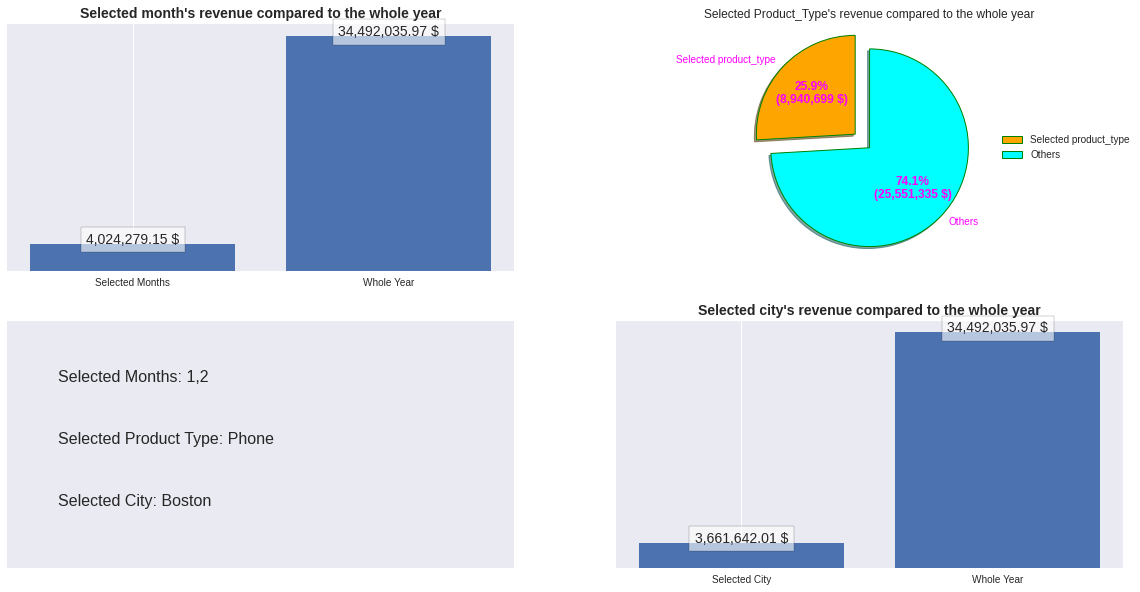

In [117]:
plt.style.use('seaborn')
#plot subplots
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (20,10));

#plot subplot1: 
ax[0,0].bar(['Selected Months','Whole Year'],[Sales.loc[Sales['Month'].isin(months)]['Sales Amount'].sum() ,Sales['Sales Amount'].sum()]);
ax[0,0].set_title('Selected month\'s revenue compared to the whole year',
            fontweight ="bold",
            fontsize = 14
            )   ;
#add value label
ax[0,0].text(0, Sales.loc[Sales['Month'].isin(months)]['Sales Amount'].sum() + 2000,'{:,} $'.format(round( Sales.loc[Sales['Month'].isin(months)]['Sales Amount'].sum(),2)), ha = 'center',
          Bbox = dict(facecolor = 'white', alpha =.6),fontsize = 14)
ax[0,0].text(1, Sales['Sales Amount'].sum() -1000, '{:,} $'.format(round( Sales['Sales Amount'].sum(),2)), ha = 'center',
          Bbox = dict(facecolor = 'white', alpha =.6),fontsize = 14)
#hide y-axis
ax[0,0].get_yaxis().set_visible(False)

#plot subplot2: 
# ---
x = ['Selected product_type','Others']
data = [round(Sales.loc[Sales['Product Type'].isin(product_types)]['Sales Amount'].sum(),2) ,
        round(Sales['Sales Amount'].sum() - Sales.loc[Sales['Product Type'].isin(product_types)]['Sales Amount'].sum(),2)]
explode = (0.2, 0.0)
colors = ( "orange", "cyan")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:,} $)".format(pct, absolute)
wedges, texts, autotexts = ax[0,1].pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = x,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
ax[0,1].legend(wedges, x,
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 12, weight ="bold")
ax[0,1].set_title('Selected Product_Type\'s revenue compared to the whole year');

#plot subplot3: 
ax[1,1].bar(['Selected City','Whole Year'],[Sales.loc[Sales['City'].isin(citys)]['Sales Amount'].sum() ,Sales['Sales Amount'].sum()]);
ax[1,1].set_title('Selected city\'s revenue compared to the whole year',
            fontweight ="bold",
            fontsize = 14
            )   ;
#add value label
ax[1,1].text(0, Sales.loc[Sales['City'].isin(citys)]['Sales Amount'].sum() + 2000,'{:,} $'.format(round( Sales.loc[Sales['City'].isin(citys)]['Sales Amount'].sum(),2)), ha = 'center',
          Bbox = dict(facecolor = 'white', alpha =.6),fontsize = 14)
ax[1,1].text(1, Sales['Sales Amount'].sum() -1000, '{:,} $'.format(round( Sales['Sales Amount'].sum(),2)), ha = 'center',
          Bbox = dict(facecolor = 'white', alpha =.6),fontsize = 14)
#hide y-axis
ax[1,1].get_yaxis().set_visible(False)

#plot subplot4: 
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].text(0.1, 0.25*3,'Selected Months: {}'.format(','.join(str(month) for month in months)),fontsize = 16);
ax[1,0].text(0.1, 0.25*2,'Selected Product Type: {}'.format(','.join(product_types)),fontsize = 16);
ax[1,0].text(0.1, 0.25*1,'Selected City: {}'.format(','.join(citys)),fontsize = 16);
